In [ ]:
!pip install seaborn

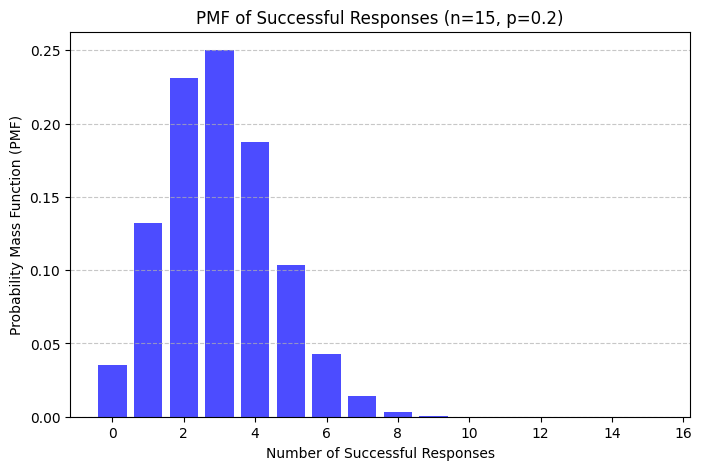

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Part (a)
n = 15
p = 0.2
x = np.arange(0, n + 1)
pmf_values = stats.binom.pmf(x, n, p)

plt.figure(figsize=(8, 5))
plt.bar(x, pmf_values, color='blue', alpha=0.7)
plt.xlabel('Number of Successful Responses')
plt.ylabel('Probability Mass Function (PMF)')
plt.title('PMF of Successful Responses (n=15, p=0.2)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


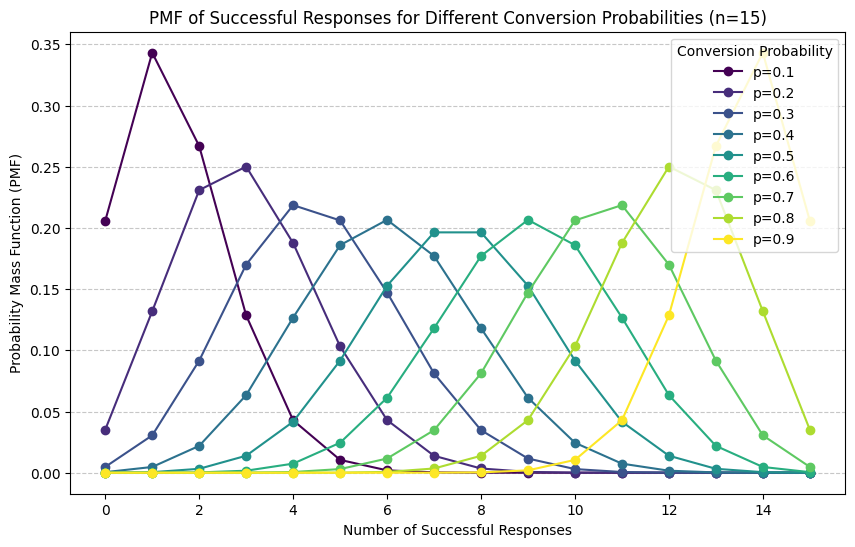

In [ ]:
# Part (b): PMF for different conversion probabilities (10% to 90%)
probabilities = np.arange(0.1, 1.0, 0.1)  # Conversion probabilities from 10% to 90%

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(probabilities)))  # Color gradient

for i, p in enumerate(probabilities):
    pmf_values = stats.binom.pmf(x, n, p)
    plt.plot(x, pmf_values, marker='o', linestyle='-', color=colors[i], label=f'p={p:.1f}')

plt.xlabel('Number of Successful Responses')
plt.ylabel('Probability Mass Function (PMF)')
plt.title('PMF of Successful Responses for Different Conversion Probabilities (n=15)')
plt.legend(title="Conversion Probability")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

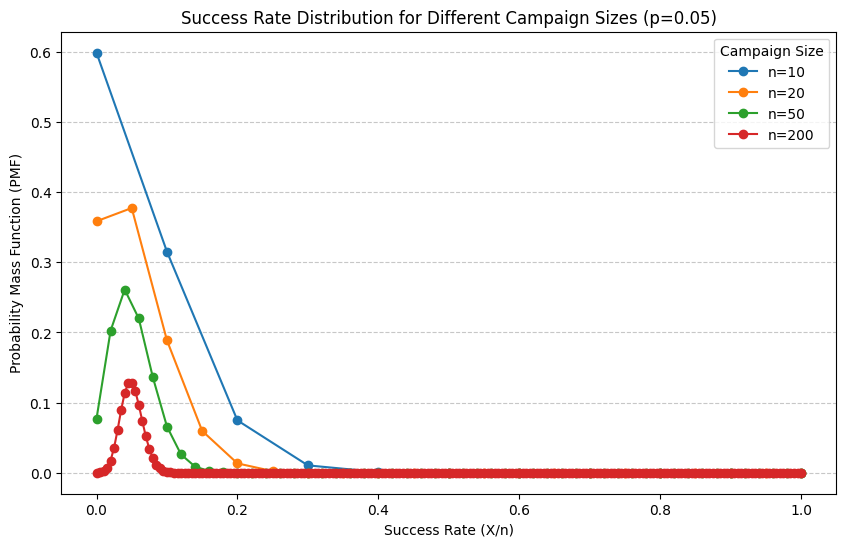

In [ ]:
# Part (c): Success rate distribution for different campaign sizes with p=0.05
campaign_sizes = [10, 20, 50, 200]
p = 0.05

plt.figure(figsize=(10, 6))

for i, n in enumerate(campaign_sizes):
    x = np.arange(0, n + 1)
    pmf_values = stats.binom.pmf(x, n, p)
    success_rates = x / n

    plt.plot(success_rates, pmf_values, marker='o', linestyle='-', label=f'n={n}')

plt.xlabel('Success Rate (X/n)')
plt.ylabel('Probability Mass Function (PMF)')
plt.title('Success Rate Distribution for Different Campaign Sizes (p=0.05)')
plt.legend(title="Campaign Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Part (a): Calculate the mean and variance for given parameters
alpha, theta = 5, 4  # Shape and Scale parameters
mean_lifetime = alpha * theta  # Mean of Gamma distribution
variance_lifetime = alpha * (theta ** 2)  # Variance of Gamma distribution
print(f"Mean Lifetime: {mean_lifetime} hours")
print(f"Variance: {variance_lifetime} hours^2")


Mean Lifetime: 20 hours
Variance: 80 hours^2


In [ ]:
# Part (b): Calculate the median using the inverse CDF (percent point function, PPF)
median_lifetime = stats.gamma.ppf(0.5, alpha, scale=theta)
print(f"Median Lifetime: {median_lifetime} hours")

Median Lifetime: 18.68363553118394 hours


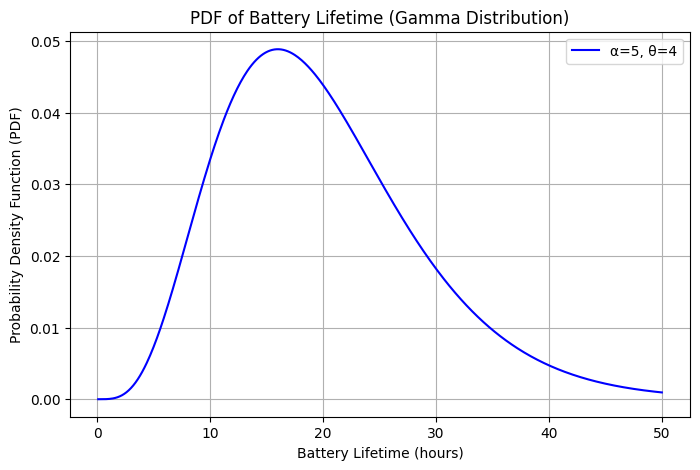

In [ ]:
# Part (c): Generate and plot the PDF for battery lifetimes
x = np.linspace(0.1, 50, 500)  # Range of lifetimes
pdf_values = stats.gamma.pdf(x, alpha, scale=theta)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, color='blue', label=f'α={alpha}, θ={theta}')
plt.xlabel('Battery Lifetime (hours)')
plt.ylabel('Probability Density Function (PDF)')
plt.title('PDF of Battery Lifetime (Gamma Distribution)')
plt.legend()
plt.grid()
plt.show()

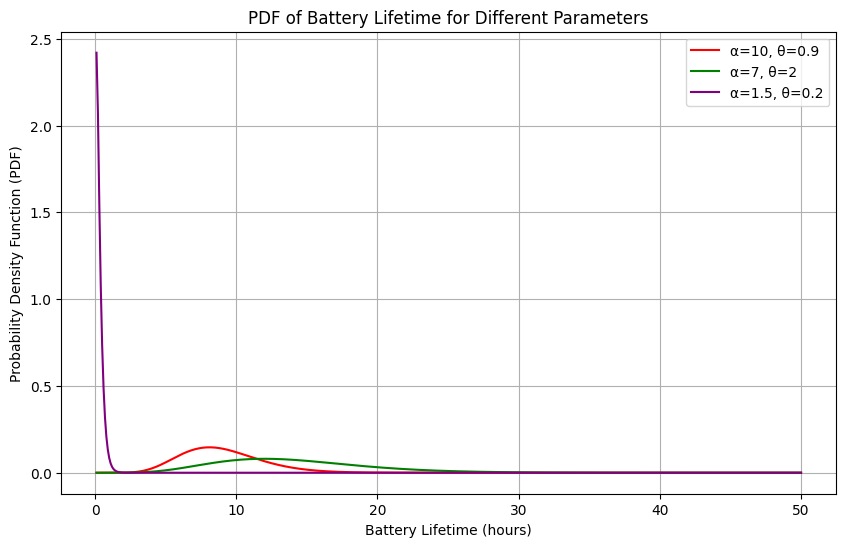

In [ ]:
# Part (d): Repeat for different parameter sets
parameter_sets = [(10, 0.9), (7, 2), (1.5, 0.2)]
colors = ['red', 'green', 'purple']

plt.figure(figsize=(10, 6))
for (alpha, theta), color in zip(parameter_sets, colors):
    pdf_values = stats.gamma.pdf(x, alpha, scale=theta)
    plt.plot(x, pdf_values, color=color, label=f'α={alpha}, θ={theta}')

plt.xlabel('Battery Lifetime (hours)')
plt.ylabel('Probability Density Function (PDF)')
plt.title('PDF of Battery Lifetime for Different Parameters')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

degrees_of_freedom = 10  # Degrees of freedom

# (a) Compute mean, standard deviation, median, Q1, and Q3
mean_lifetime = degrees_of_freedom
std_lifetime = np.sqrt(2 * degrees_of_freedom)
median_lifetime = stats.chi2.median(degrees_of_freedom)
q1 = stats.chi2.ppf(0.25, degrees_of_freedom)
q3 = stats.chi2.ppf(0.75, degrees_of_freedom)

# Display results
print(f"Mean Lifetime: {mean_lifetime:.2f} hours")
print(f"Standard Deviation: {std_lifetime:.2f} hours")
print(f"Median Lifetime: {median_lifetime:.2f} hours")
print(f"First Quartile (Q1): {q1:.2f} hours")
print(f"Third Quartile (Q3): {q3:.2f} hours")

Mean Lifetime: 10.00 hours
Standard Deviation: 4.47 hours
Median Lifetime: 9.34 hours
First Quartile (Q1): 6.74 hours
Third Quartile (Q3): 12.55 hours


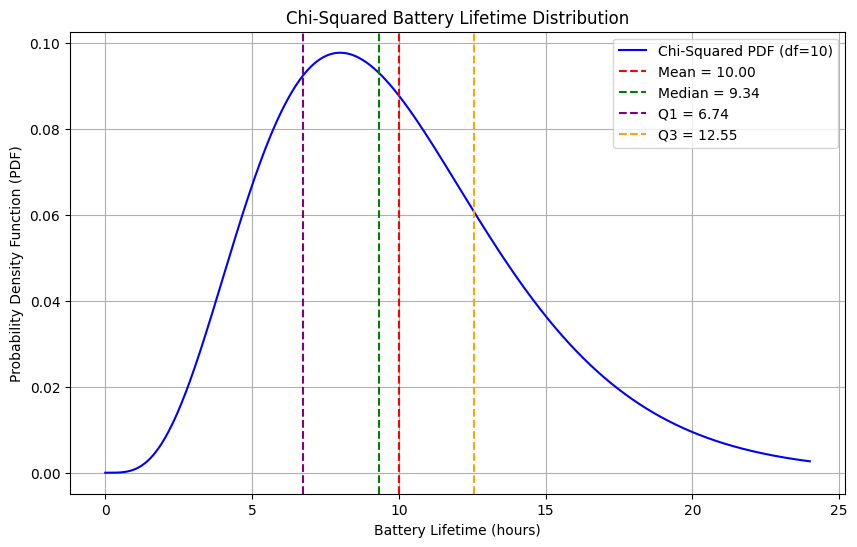

In [ ]:
# (b) Plot PDF with markers for mean, median, and quartiles
x = np.linspace(0, 24, 1000)
pdf_values = stats.chi2.pdf(x, degrees_of_freedom)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label=f'Chi-Squared PDF (degrees_of_freedom={degrees_of_freedom})', color='blue')
plt.axvline(mean_lifetime, color='red', linestyle='--', label=f'Mean = {mean_lifetime:.2f}')
plt.axvline(median_lifetime, color='green', linestyle='--', label=f'Median = {median_lifetime:.2f}')
plt.axvline(q1, color='purple', linestyle='--', label=f'Q1 = {q1:.2f}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3 = {q3:.2f}')

plt.xlabel('Battery Lifetime (hours)')
plt.ylabel('Probability Density Function (PDF)')
plt.title('Chi-Squared Battery Lifetime Distribution')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# (c) Compute first, second, and third moments using MGF
# MGF of chi-squared: M(t) = (1 - 2t)^(-n/2) for t < 1/2

def mgf_chi_squared(t, degrees_of_freedom):
    return (1 - 2 * t) ** (-degrees_of_freedom / 2)

# First moment (mean)
m1 = degrees_of_freedom

# Second moment (E[X^2])
m2 = 2 * degrees_of_freedom * (degrees_of_freedom + 1)

# Third moment (E[X^3])
m3 = 8 * degrees_of_freedom * (degrees_of_freedom + 1) * (degrees_of_freedom + 2)

# Display moments
print(f"First Moment (Mean): {m1:.2f}")
print(f"Second Moment: {m2:.2f}")
print(f"Third Moment: {m3:.2f}")

First Moment (Mean): 10.00
Second Moment: 220.00
Third Moment: 10560.00
